In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from cmdstanpy import CmdStanModel

# Michal - 6 liter
# Motyl - 5 liter
N = (6 + 5)*100

### generate the data

based on provided stan code

In [3]:
sim1 = CmdStanModel(stan_file="code_1.stan")

INFO:cmdstanpy:compiling stan file /home/Lab6/code_1.stan to exe file /home/Lab6/code_1
INFO:cmdstanpy:compiled model executable: /home/Lab6/code_1


In [4]:
data1=sim1.sample(data={'N': N}, 
                  seed=25042023, 
                  iter_sampling=1, 
                  iter_warmup=0, 
                  chains=1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [6]:
sim1_df = data1.draws_pd()
sim1_df.head()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1091],y[1092],y[1093],y[1094],y[1095],y[1096],y[1097],y[1098],y[1099],y[1100]
0,0.0,0.0,0.01,1.16549,0.079893,1.2503,0.824636,-2.04719,-0.325304,0.958276,...,-0.754127,0.435651,-1.81777,0.168938,1.79519,-0.447607,0.173393,-0.928014,0.310178,0.12669


In [7]:
sim2 = CmdStanModel(stan_file="code_2.stan")

INFO:cmdstanpy:compiling stan file /home/Lab6/code_2.stan to exe file /home/Lab6/code_2
INFO:cmdstanpy:compiled model executable: /home/Lab6/code_2


In [8]:
data2=sim2.sample(data={'N': N}, 
                  seed=25042023, 
                  iter_sampling=1, 
                  iter_warmup=0, 
                  chains=1)


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [9]:
sim2_df = data2.draws_pd()
sim2_df.head()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1091],y[1092],y[1093],y[1094],y[1095],y[1096],y[1097],y[1098],y[1099],y[1100]
0,0.0,0.0,1.16549,-0.27026,-1.73173,-1.22371,-0.314025,0.485908,-0.325304,-0.979494,...,-1.16669,-0.717634,-0.916514,0.861765,3.6015,-1.75489,1.12528,1.53917,0.106365,1.14749


### fit the data now


In [10]:
sim3 = CmdStanModel(stan_file="code_3.stan")

INFO:cmdstanpy:compiling stan file /home/Lab6/code_3.stan to exe file /home/Lab6/code_3
INFO:cmdstanpy:compiled model executable: /home/Lab6/code_3


In [11]:
sim4 = CmdStanModel(stan_file="code_4.stan")

INFO:cmdstanpy:compiling stan file /home/Lab6/code_4.stan to exe file /home/Lab6/code_4
INFO:cmdstanpy:compiled model executable: /home/Lab6/code_4


In [14]:
data_fit = {"N": N, 
            "y": sim1_df.loc[:, 'y[1]':f'y[{N}]'].values.reshape((N,))}
fit1_for_sim1 = sim3.sample(data=data_fit, 
                           seed=25042023)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)








chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)






chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)





chain 1 |██████████| 00:04 Sampling completed                       
chain 2 |██████████| 00:04 Sampling completed                       
chain 3 |██████████| 00:04 Sampling completed                       
chain 4 |██████████| 00:04 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [15]:
fit2_for_sim1 = sim4.sample(data=data_fit, seed=25042023)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)







chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:03 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:04 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:04 Iteration: 1700


INFO:cmdstanpy:CmdStan done processing.


In [22]:
fit1_az = az.from_cmdstanpy(posterior=fit1_for_sim1)
fit2_az = az.from_cmdstanpy(posterior=fit2_for_sim1)

In [23]:
fit1_az

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [24]:
fit2_az

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [25]:
model_dict = {"Normal model": fit1_az, "Student model": fit2_az}
model_comparison = az.compare(model_dict, 
                              ic="loo", 
                              scale="deviance")
print(model_comparison)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


               rank          loo      p_loo       d_loo   weight          se  \
Student model     0  3324.106828   5.831752    0.000000  0.92513   67.246562   
Normal model      1  3720.415186  24.702091  396.308358  0.07487  256.565537   

                      dse  warning loo_scale  
Student model    0.000000    False  deviance  
Normal model   209.084203     True  deviance  


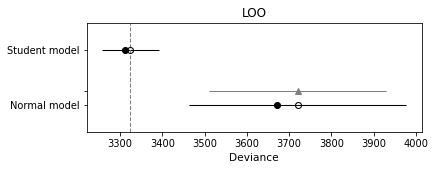

In [26]:
az.plot_compare(model_comparison)
plt.title('LOO')
plt.show()
